In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood-cells/dataset-master/dataset-master/labels.csv
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00236.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00043.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00281.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00021.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00377.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00307.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00199.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00124.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00132.xml
/kaggle/input/blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00222.xml
/kaggle/input/blood-cells/dataset-master/da

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import tensorflow as tf 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix 

2025-07-30 17:40:38.921775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753897239.081871      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753897239.135329      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
train_dir = "/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TRAIN"
test_dir = "/kaggle/input/blood-cells/dataset2-master/dataset2-master/images/TEST"


# Load Image Data 

In [16]:
# Create generators

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [17]:
# Flow image data

train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


# Build Model

In [18]:
 pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False 

# Build Classification  Model 

In [19]:
inputs = pretrained_model.input 
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4 , activation='softmax')(x)

model = tf.keras.Model(inputs = inputs  , outputs = outputs)

model.compile(optimizer = 'adam'  ,loss = 'categorical_crossentropy' , metrics = ['accuracy'])

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [20]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100


I0000 00:00:1753898882.651626     148 service.cc:148] XLA service 0x7db60c001700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753898882.652332     148 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1753898883.504111     148 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/249 ━━━━━━━━━━━━━━━━━━━━ 47:47 12s/step - accuracy: 0.2188 - loss: 2.2381

I0000 00:00:1753898886.911645     148 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


249/249 ━━━━━━━━━━━━━━━━━━━━ 89s 312ms/step - accuracy: 0.5207 - loss: 1.1428 - val_accuracy: 0.7144 - val_loss: 0.6951
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7912 - loss: 0.5539 - val_accuracy: 0.8150 - val_loss: 0.4649
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8565 - loss: 0.3919 - val_accuracy: 0.8577 - val_loss: 0.3763
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8840 - loss: 0.3088 - val_accuracy: 0.8763 - val_loss: 0.3271
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9148 - loss: 0.2391 - val_accuracy: 0.8824 - val_loss: 0.2994
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9314 - loss: 0.1958 - val_accuracy: 0.8758 - val_loss: 0.3133
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.9389 - loss: 0.1756 - val_accuracy: 0.8884 - val_loss: 0.2781
Epoch 8/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9562 - loss: 0.1396 - val

In [22]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Training and Validation Loss Over Time"
)

fig.show()

# Results 

In [23]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 315ms/step
Test Accuracy: 50.945%


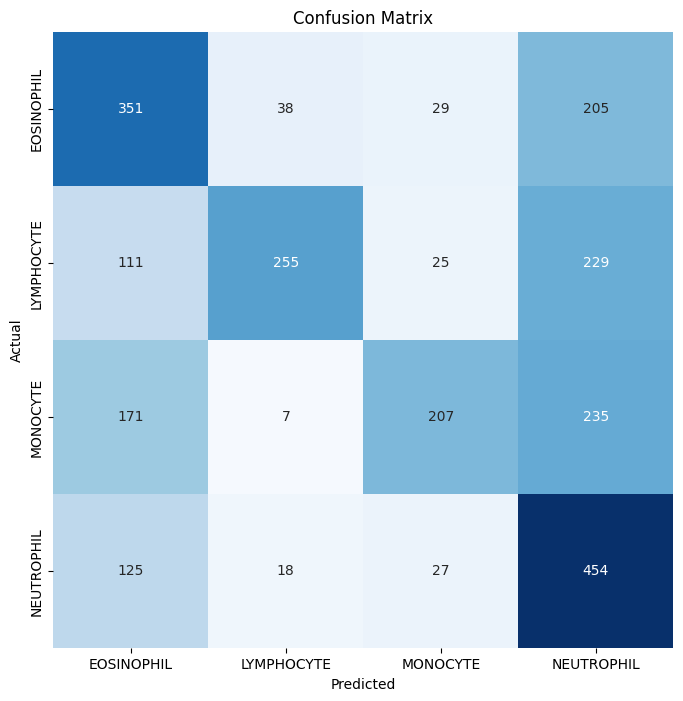

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.46      0.56      0.51       623
  LYMPHOCYTE       0.80      0.41      0.54       620
    MONOCYTE       0.72      0.33      0.46       620
  NEUTROPHIL       0.40      0.73      0.52       624

    accuracy                           0.51      2487
   macro avg       0.60      0.51      0.51      2487
weighted avg       0.60      0.51      0.51      2487



In [24]:
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Found 1989 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step
Validation Accuracy: 93.162%


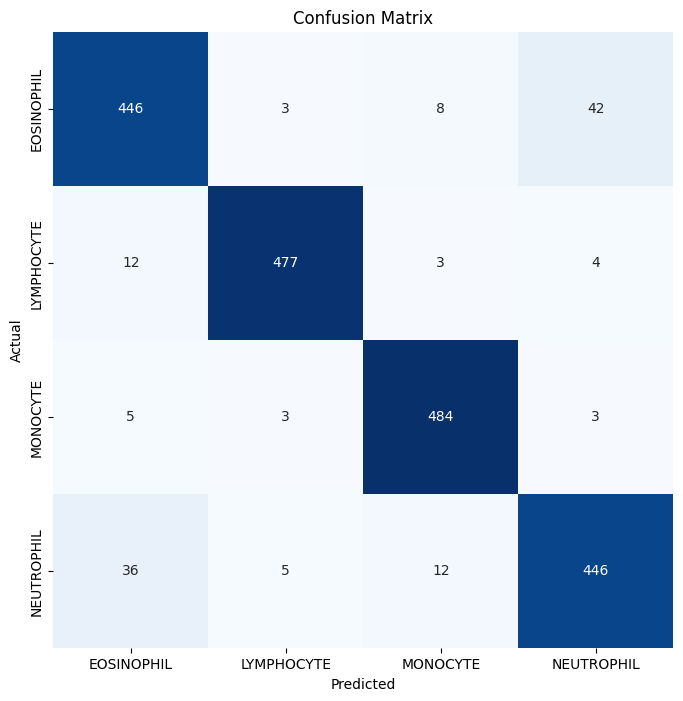

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.89      0.89      0.89       499
  LYMPHOCYTE       0.98      0.96      0.97       496
    MONOCYTE       0.95      0.98      0.97       495
  NEUTROPHIL       0.90      0.89      0.90       499

    accuracy                           0.93      1989
   macro avg       0.93      0.93      0.93      1989
weighted avg       0.93      0.93      0.93      1989



In [25]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)


predictions = np.argmax(model.predict(val_images), axis=1)

acc = accuracy_score(val_images.labels, predictions)
cm = tf.math.confusion_matrix(val_images.labels, predictions)
clr = classification_report(val_images.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [26]:
model.save("blood_cell.h5")